# Fibonacci

https://en.wikipedia.org/wiki/Fibonacci_sequence

[*********************100%%**********************]  1 of 1 completed


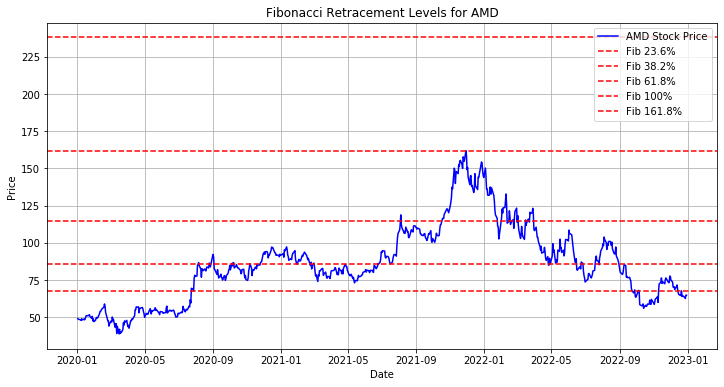

In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close']

# Fibonacci retracement levels function
def calculate_fibonacci_levels(data, low, high):
    fibonacci_levels = [0.236, 0.382, 0.618, 1.000, 1.618]  # Common Fibonacci levels
    
    price_range = high - low
    fibonacci_values = [low + level * price_range for level in fibonacci_levels]
    
    return fibonacci_values

# Calculate Fibonacci retracement levels
low_price = min(data)
high_price = max(data)
fibonacci_levels = calculate_fibonacci_levels(data, low_price, high_price)

# Plot the stock price data and Fibonacci levels
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label=symbol + ' Stock Price', color='b')
for level, label in zip(fibonacci_levels, ['23.6%', '38.2%', '61.8%', '100%', '161.8%']):
    plt.axhline(level, linestyle='--', color='r', label=f'Fib {label}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Fibonacci Retracement Levels for ' + symbol)
plt.legend()
plt.grid(True)
plt.show()


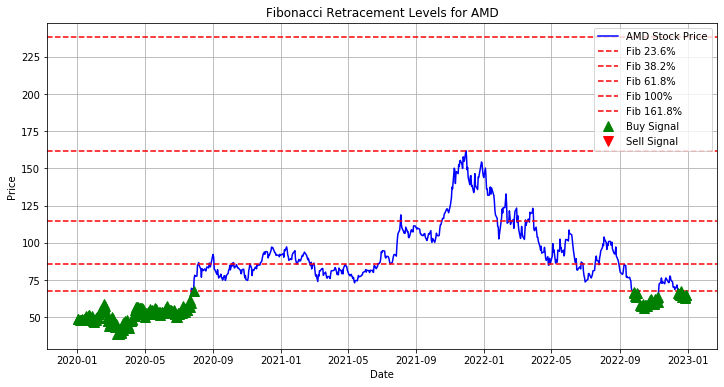

In [2]:
# Plot the stock price data and Fibonacci levels
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label=symbol + ' Stock Price', color='b')
for level, label in zip(fibonacci_levels, ['23.6%', '38.2%', '61.8%', '100%', '161.8%']):
    plt.axhline(level, linestyle='--', color='r', label=f'Fib {label}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Fibonacci Retracement Levels for ' + symbol)
plt.legend()
plt.grid(True)

# Adding Buy and Sell Signals
buy_signal = []
sell_signal = []
for price in data:
    if price < fibonacci_levels[0]:  # Below 23.6% level
        buy_signal.append(price)
        sell_signal.append(np.nan)
    elif price > fibonacci_levels[3]:  # Above 100% level
        buy_signal.append(np.nan)
        sell_signal.append(price)
    else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)

plt.plot(data.index, buy_signal, '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data.index, sell_signal, 'v', markersize=10, color='r', label='Sell Signal')
plt.legend()

plt.show()